In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/air_quality_health_dataset.csv')
print(df.head())
print(df.info())

          city        date  aqi  pm2_5  pm10   no2    o3  temperature  \
0  Los Angeles  2020-01-01   65   34.0  52.7   2.2  38.5         33.5   
1      Beijing  2020-01-02  137   33.7  31.5  36.7  27.5         -1.6   
2       London  2020-01-03  266   43.0  59.6  30.4  57.3         36.4   
3  Mexico City  2020-01-04  293   33.7  37.9  12.3  42.7         -1.0   
4        Delhi  2020-01-05  493   50.3  34.8  31.2  35.6         33.5   

   humidity  hospital_admissions population_density  hospital_capacity  
0        33                    5              Rural               1337  
1        32                    4              Urban               1545  
2        25                   10           Suburban               1539  
3        67                   10              Urban                552  
4        72                    9           Suburban               1631  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column   

In [5]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())


Missing values:
 city                   0
date                   0
aqi                    0
pm2_5                  0
pm10                   0
no2                    0
o3                     0
temperature            0
humidity               0
hospital_admissions    0
population_density     0
hospital_capacity      0
dtype: int64


In [7]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [15]:
# Top 10 days with the highest PM2.5 levels
top_pm25 = df.nlargest(10, 'pm2_5')[['city', 'date', 'pm2_5']]
print(top_pm25)


              city       date  pm2_5
52628        Delhi 2164-02-03  109.9
43181        Delhi 2138-03-24  108.7
31482        Cairo 2106-03-13  105.2
5164   Mexico City 2034-02-20  103.8
75840        Delhi 2227-08-24   96.3
43350        Delhi 2138-09-09   95.9
10471  Mexico City 2048-09-01   94.7
40433        Delhi 2130-09-14   94.1
57637        Delhi 2177-10-21   93.4
77990        Delhi 2233-07-13   92.9


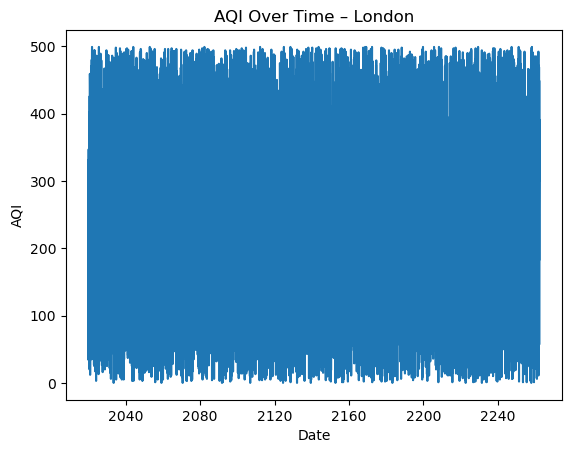

In [17]:
#Line plot of Air Quality Index (AQI) in London
la = df[df['city']=='London']
plt.plot(la['date'], la['aqi'])
plt.title('AQI Over Time – London')
plt.ylabel('AQI')
plt.xlabel('Date')
plt.show()


In [35]:
# Average hospital admissions per city (Top 10 cities)
df.groupby('city')['hospital_admissions'].mean().sort_values(ascending=False).head(10)

city
Cairo          8.108519
Beijing        8.096039
London         8.057409
Delhi          8.044323
Tokyo          8.028469
Los Angeles    8.021215
Mexico City    8.007550
São Paulo      7.952517
Name: hospital_admissions, dtype: float64

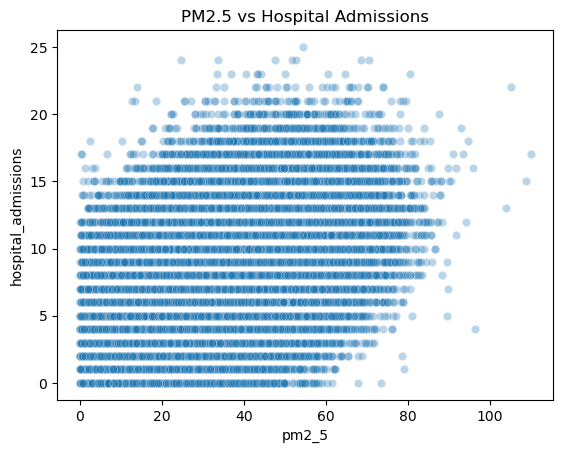

In [37]:
# Scatter plot showing the relationship between PM2.5 levels and hospital admissions
sns.scatterplot(data=df, x='pm2_5', y='hospital_admissions', alpha=0.3)
plt.title('PM2.5 vs Hospital Admissions')
plt.show()


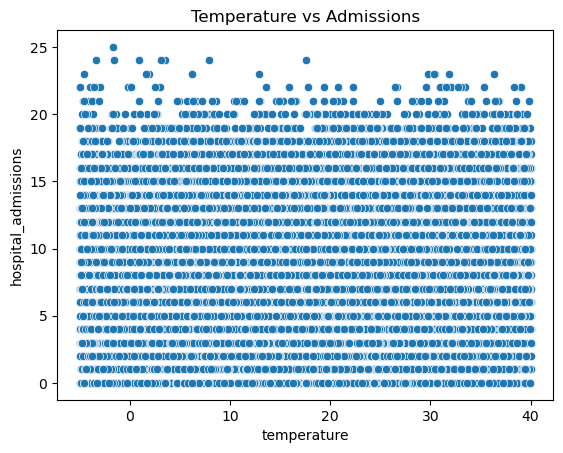

In [41]:
# Scatter plot showing the relationship between temperature and hospital admissions
sns.scatterplot(data=df, x='temperature', y='hospital_admissions')
plt.title('Temperature vs Admissions')
plt.show()


In [43]:
# Average Air Quality Index (AQI) by population density
df.groupby('population_density')['aqi'].mean()

population_density
Rural       252.397079
Suburban    248.999131
Urban       249.052207
Name: aqi, dtype: float64

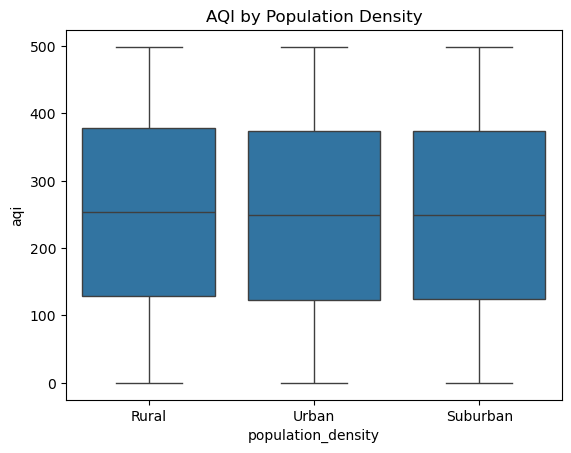

In [45]:
# Boxplot of AQI levels by population density
sns.boxplot(data=df, x='population_density', y='aqi')
plt.title('AQI by Population Density')
plt.show()


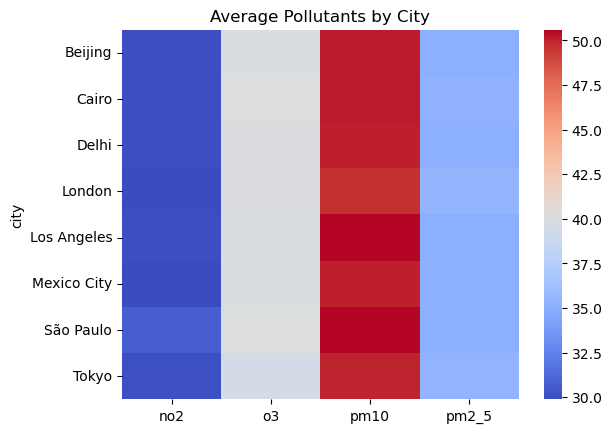

In [49]:
# Heatmap showing average pollution levels (PM2.5, PM10, NO2, O3) by city

pollutants = df.pivot_table(index='city', values=['pm2_5','pm10','no2','o3'], aggfunc='mean')
sns.heatmap(pollutants, cmap='coolwarm')
plt.title('Average Pollutants by City')
plt.show()


In [61]:
# Top cities with the highest total hospital admissions
df.groupby('city')['hospital_admissions'].sum().nlargest(10)


city
Delhi          212893
Beijing        178631
Mexico City    107117
Los Angeles     72215
London          56281
Tokyo           49351
Cairo           21893
São Paulo       13901
Name: hospital_admissions, dtype: int64

Days with Hazardous AQI (>300) by City:
city
Delhi          10492
Beijing         8752
Mexico City     5250
Los Angeles     3617
London          2771
Tokyo           2402
Cairo           1101
São Paulo        676
dtype: int64


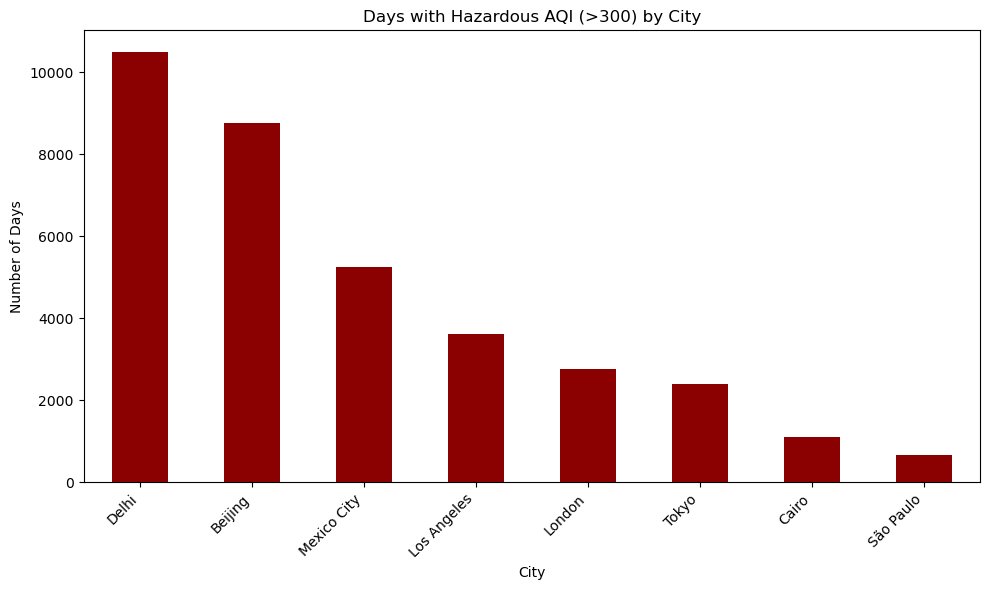

Insight: Highlights cities with the most severe pollution episodes.


In [105]:
#City Comparison of Extreme Pollution Days
# Count days with AQI > 300 (Hazardous) by city

hazardous_days = df[df['aqi'] > 300].groupby('city').size().sort_values(ascending=False)
print("Days with Hazardous AQI (>300) by City:")
print(hazardous_days)
plt.figure(figsize=(10, 6))
hazardous_days.plot(kind='bar', color='darkred')
plt.title('Days with Hazardous AQI (>300) by City')
plt.xlabel('City')
plt.ylabel('Number of Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
# Annual average AQI over the years
mask = (df['date']>='2020-01-01')&(df['date']<'2021-01-01')
df[mask].groupby('city')['aqi'].mean()


city
Beijing        273.400000
Cairo          236.916667
Delhi          245.412281
London         221.064516
Los Angeles    268.189189
Mexico City    249.177419
São Paulo      392.000000
Tokyo          237.458333
Name: aqi, dtype: float64

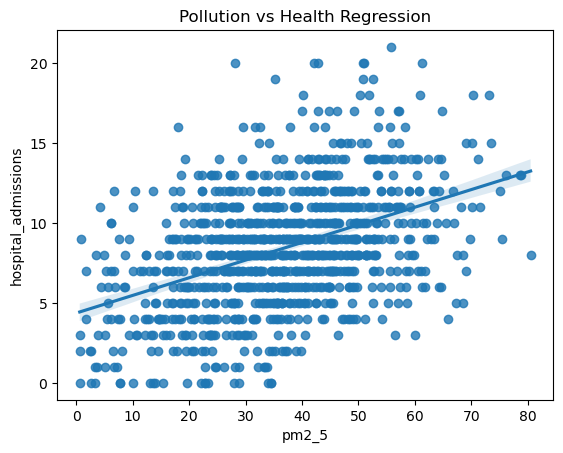

In [85]:
#Simple Linear Regression Analysis: Relationship between PM2.5 and Hospital Admissions
sns.regplot(x='pm2_5', y='hospital_admissions', data=df.sample(1000))
plt.title('Pollution vs Health Regression')
plt.show()


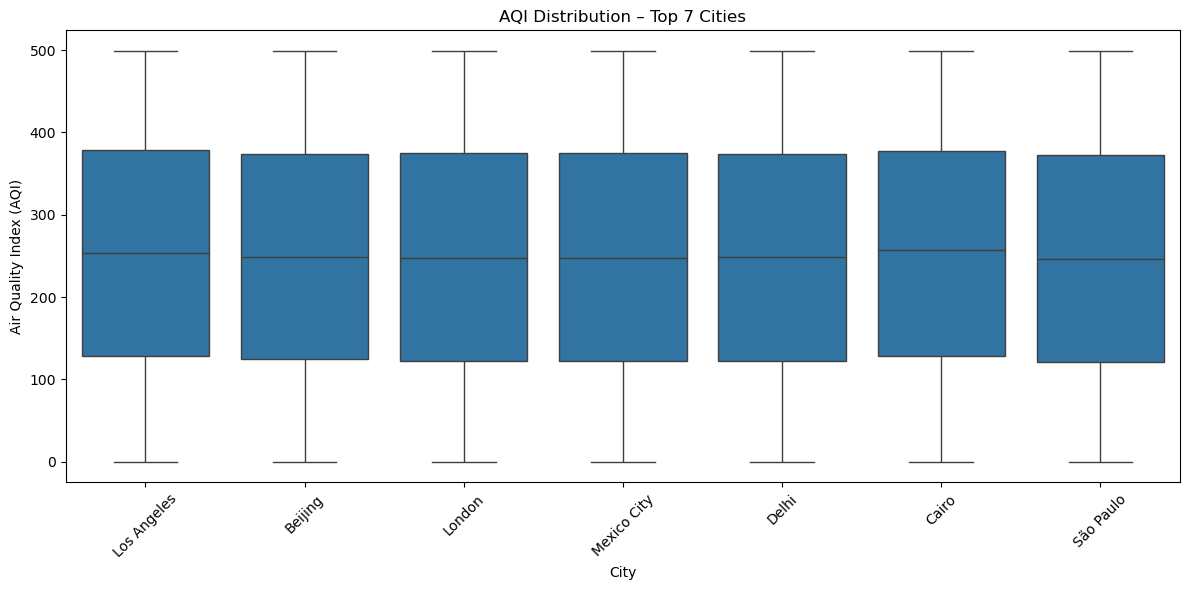

In [95]:
# 18. AQI Distribution for the Top 7 Most Polluted Cities
top7 = df.groupby('city')['aqi'].mean().nlargest(7).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['city'].isin(top7)], x='city', y='aqi')
plt.title('AQI Distribution – Top 7 Cities')
plt.xticks(rotation=45)
plt.ylabel('Air Quality Index (AQI)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

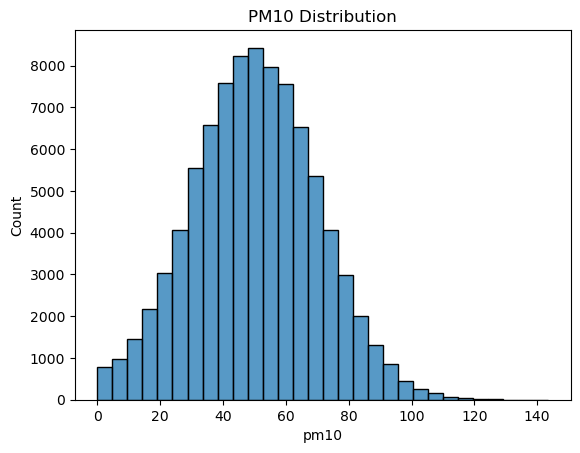

In [93]:
sns.histplot(df['pm10'], bins=30)
plt.title('PM10 Distribution')
plt.show()


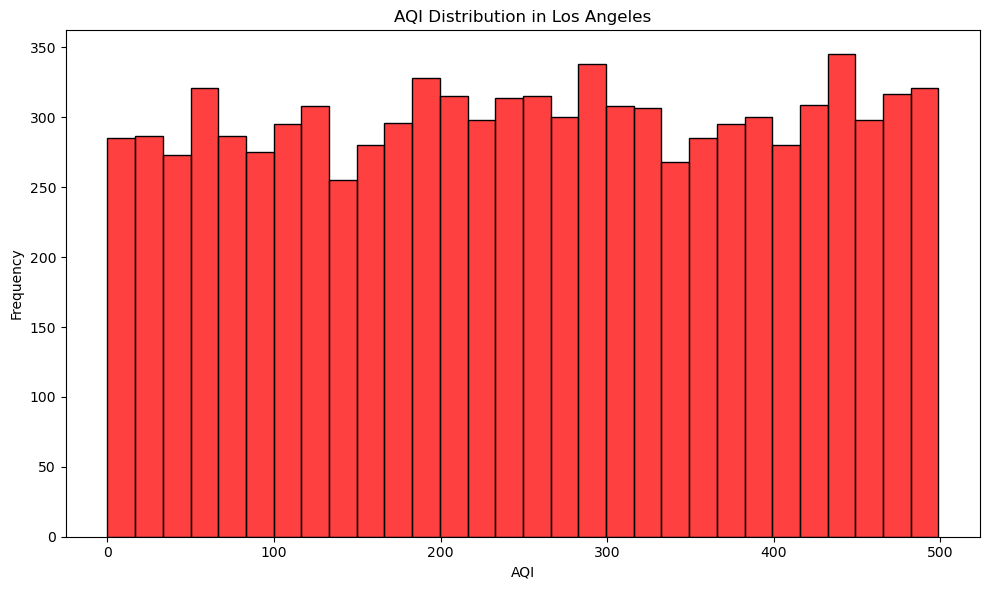

In [103]:
# City-Specific AQI Histogram
# Plot AQI distribution for top polluted city
top_city = df.groupby('city')['aqi'].mean().idxmax()
plt.figure(figsize=(10, 6))
sns.histplot(df[df['city'] == top_city]['aqi'], bins=30, color='red')
plt.title(f'AQI Distribution in {top_city}')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Average AQI: Weekday vs. Weekend:
is_weekend
False    250.043002
True     247.688078
Name: aqi, dtype: float64


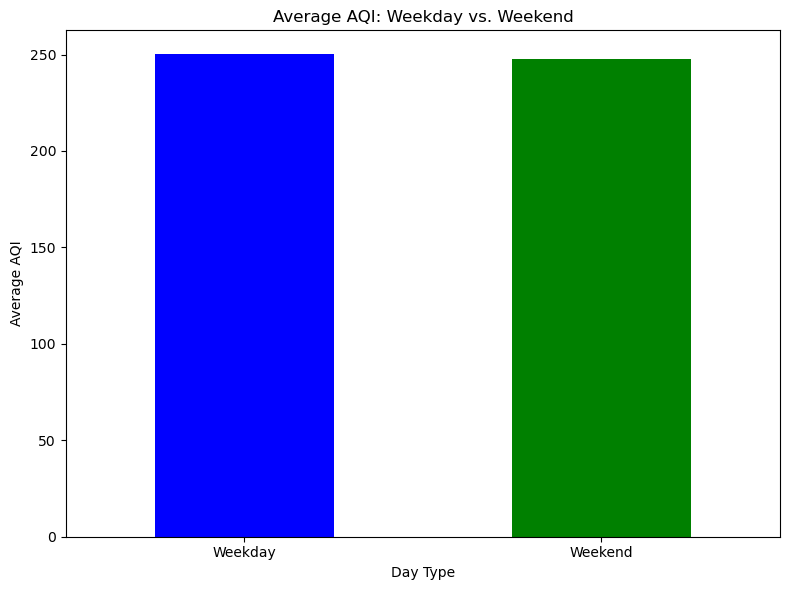

In [99]:
# Weekend vs. Weekday AQI Comparison
# Compare AQI on weekends vs. weekdays
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6])
aqi_weekend = df.groupby('is_weekend')['aqi'].mean()
print("Average AQI: Weekday vs. Weekend:")
print(aqi_weekend)
plt.figure(figsize=(8, 6))
aqi_weekend.plot(kind='bar', color=['blue', 'green'])
plt.title('Average AQI: Weekday vs. Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average AQI')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.tight_layout()
plt.show()

AQI Variance by Month and City:
month                  1             2             3             4   \
city                                                                  
Beijing      20251.681782  20576.396850  20909.597959  21001.512997   
Cairo        22705.849318  22288.054296  19675.014705  22323.321760   
Delhi        21026.724436  21608.593142  20438.884101  21371.467676   
London       20459.647485  21444.243397  21388.372484  20603.003784   
Los Angeles  20834.124699  20175.640740  19664.042579  21125.159225   
Mexico City  20906.085357  21322.747489  21224.460180  20530.157560   
São Paulo    21133.356530  18837.132799  21166.645705  22055.874986   
Tokyo        20889.843681  19752.248083  20345.702500  20886.261658   

month                  5             6             7             8   \
city                                                                  
Beijing      20349.831404  20626.295799  21085.438105  20878.264081   
Cairo        20485.494110  19504.547400  209

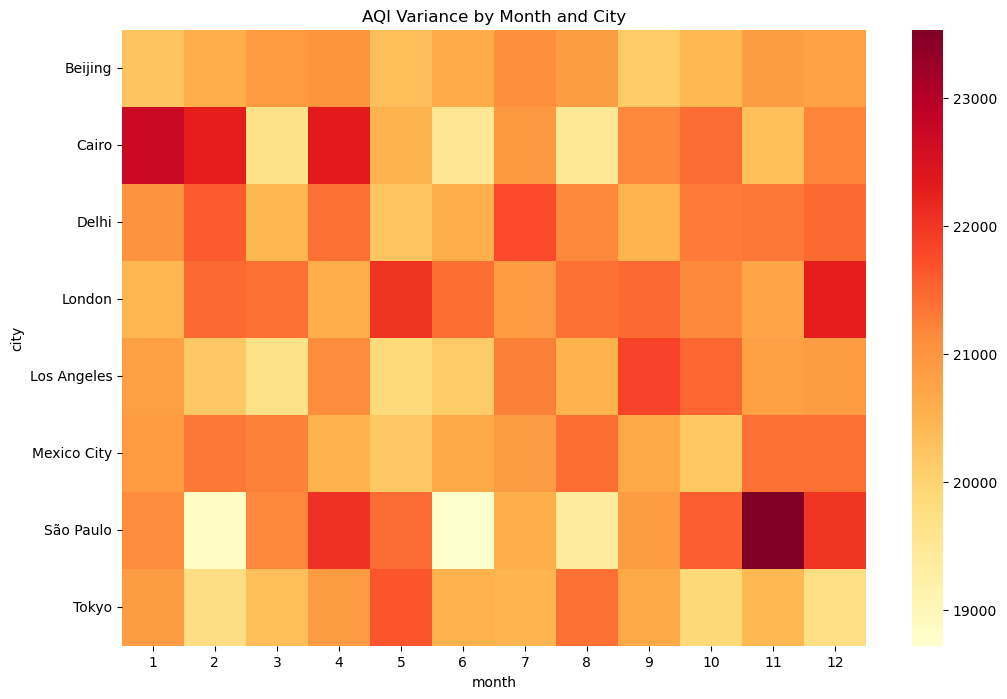

In [109]:
#Monthly AQI Variance by City
# Calculate variance of AQI by month for each city
df['month'] = df['date'].dt.month
aqi_variance = df.groupby(['city', 'month'])['aqi'].var().unstack()
print("AQI Variance by Month and City:")
print(aqi_variance)
plt.figure(figsize=(12, 8))
sns.heatmap(aqi_variance, cmap='YlOrRd')
plt.title('AQI Variance by Month and City')
plt.show()

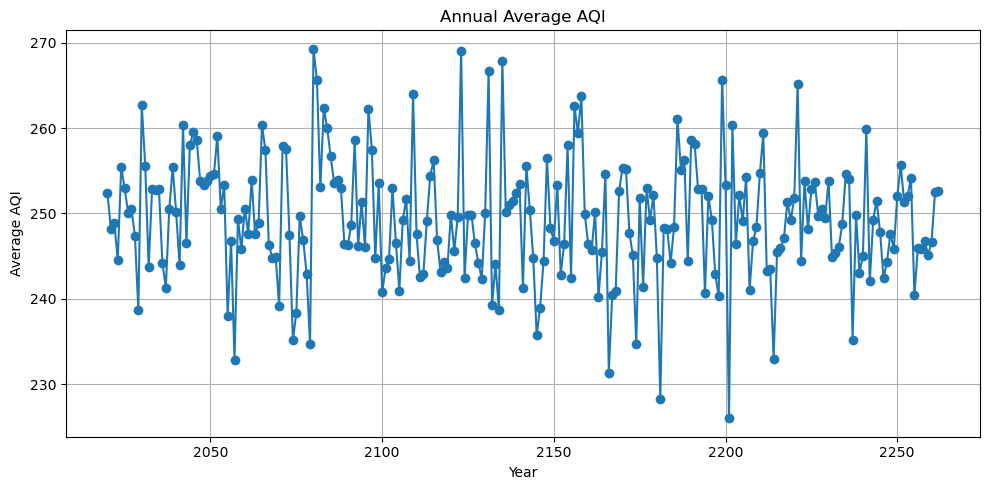

In [67]:
# Annual average AQI over the years
annual_avg_aqi = df.groupby(df['date'].dt.year)['aqi'].mean()

plt.figure(figsize=(10, 5))
annual_avg_aqi.plot(marker='o')
plt.title('Annual Average AQI')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.tight_layout()
plt.show()

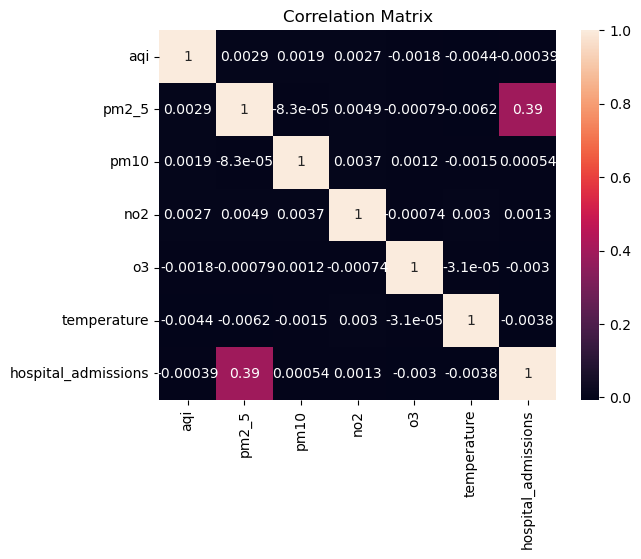

In [73]:
sns.heatmap(df[['aqi','pm2_5','pm10','no2','o3','temperature','hospital_admissions']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()
